### 6400839 ชยุตม์ แสงสุริโยทัย

### DataSet Anime : https://www.kaggle.com/datasets/vishalmane10/anime-dataset-2022
### DataSet NBA : https://www.kaggle.com/datasets/justinas/nba-players-data/data
### DataSet Airline : https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [1]:
!pip install pymongo 

In [2]:
from pymongo import MongoClient

# Requires the PyMongo package.
# https://api.mongodb.com/python/current

client = MongoClient('mongodb://localhost:27017/')
filter={}

result = client['6400839_Final']['AnimeDataSet'].find(
  filter=filter
)

In [3]:
from pymongo import MongoClient
import pandas as pd
import json

mydb = client["6400839_Final"]
mycol = mydb["AnimeDataSet"]

### เพิ่ม Anime.csv ลงไปใน DataBase (Dataอื่นๆขออนุญาตลบขั้นตอนออกเพราะโค๊ดยาวนะครับ ขอบคุณครับ /\) 

In [20]:
df = pd.read_csv('./files/Anime.csv')
data_json = json.loads(df.to_json(orient='records'))
mycol.insert_many(data_json)

InsertManyResult([ObjectId('656d4b6cfbf7a38396e7811f'), ObjectId('656d4b6cfbf7a38396e78120'), ObjectId('656d4b6cfbf7a38396e78121'), ObjectId('656d4b6cfbf7a38396e78122'), ObjectId('656d4b6cfbf7a38396e78123'), ObjectId('656d4b6cfbf7a38396e78124'), ObjectId('656d4b6cfbf7a38396e78125'), ObjectId('656d4b6cfbf7a38396e78126'), ObjectId('656d4b6cfbf7a38396e78127'), ObjectId('656d4b6cfbf7a38396e78128'), ObjectId('656d4b6cfbf7a38396e78129'), ObjectId('656d4b6cfbf7a38396e7812a'), ObjectId('656d4b6cfbf7a38396e7812b'), ObjectId('656d4b6cfbf7a38396e7812c'), ObjectId('656d4b6cfbf7a38396e7812d'), ObjectId('656d4b6cfbf7a38396e7812e'), ObjectId('656d4b6cfbf7a38396e7812f'), ObjectId('656d4b6cfbf7a38396e78130'), ObjectId('656d4b6cfbf7a38396e78131'), ObjectId('656d4b6cfbf7a38396e78132'), ObjectId('656d4b6cfbf7a38396e78133'), ObjectId('656d4b6cfbf7a38396e78134'), ObjectId('656d4b6cfbf7a38396e78135'), ObjectId('656d4b6cfbf7a38396e78136'), ObjectId('656d4b6cfbf7a38396e78137'), ObjectId('656d4b6cfbf7a38396e781

###  1. Histogram / แสดงการเดินทางล่าช้าใน 30-90 นาที

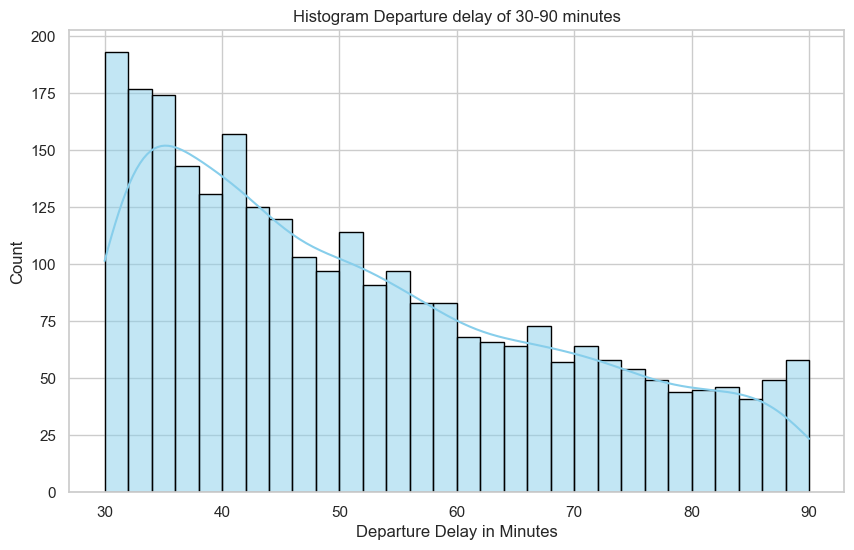

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

client = MongoClient('mongodb://localhost:27017/')
filter={'Departure Delay in Minutes': {'$gte': 30, '$lte': 90}}
project={'Departure Delay in Minutes': 1}
sort=list({'pts': -1}.items())

result = client['6400839_Final']['Airline'].find(filter=filter,projection=project,sort=sort)
df = pd.DataFrame(list(result))

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Departure Delay in Minutes'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Histogram Departure delay of 30-90 minutes')
plt.show()

### 2. Bar Plot (แบบธรรมดา) / แสดงจำนวน Anime ที่ออกอากาศในแต่ละปี

Text(0.5, 1.0, 'Number of anime broadcasts each year')

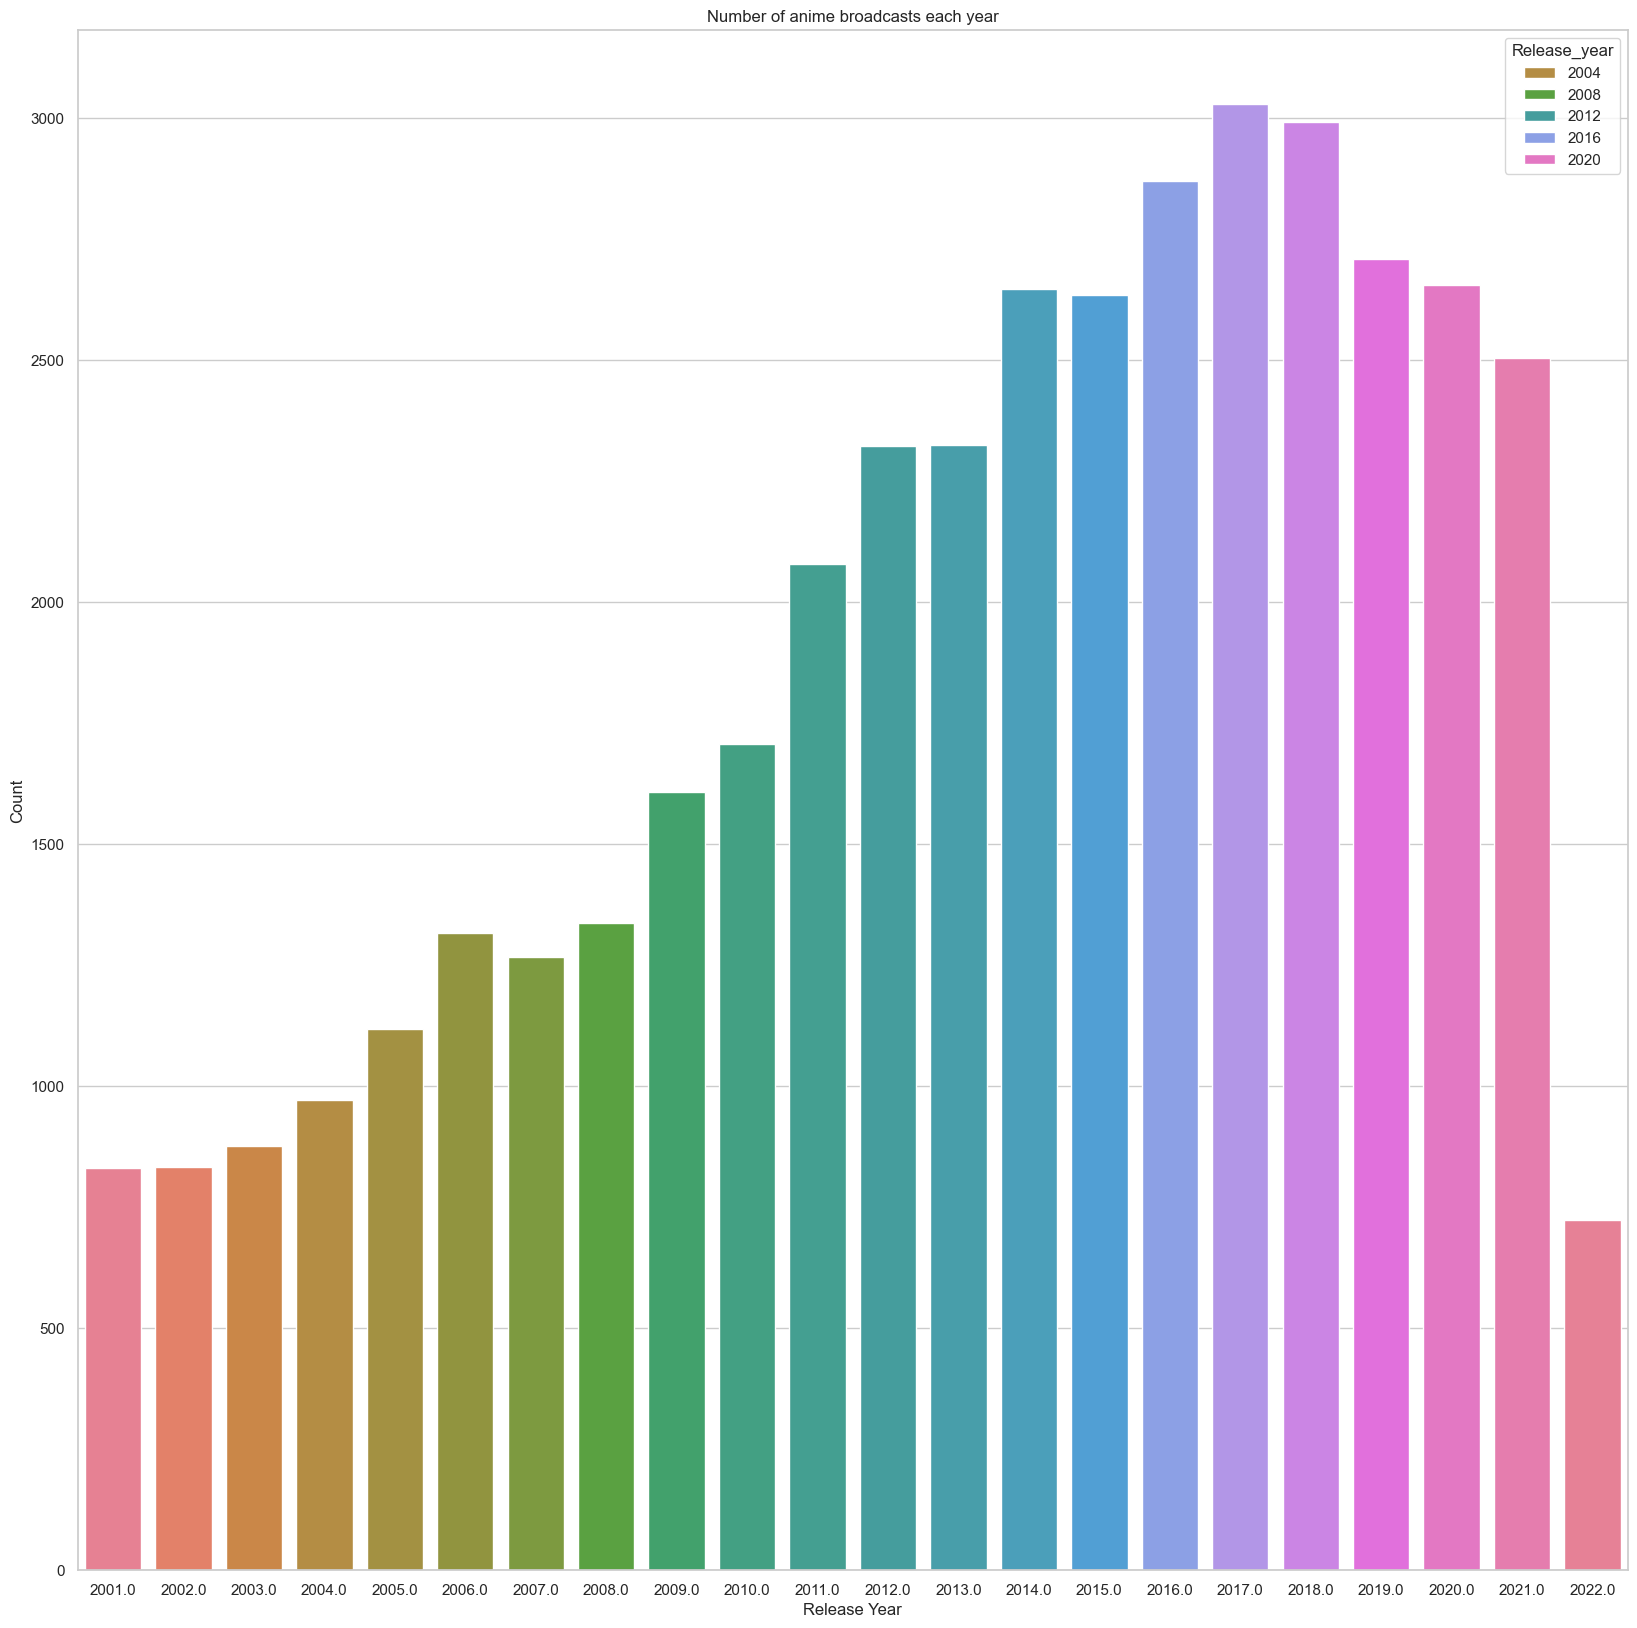

In [137]:
client = MongoClient('mongodb://localhost:27017/')
filter={'Release_year': {'$gte': 2000, '$lte': 2022}}
project={'Name': 1, 'Release_year': 1}
sort=list({'Release_year': 1}.items())

result = client['6400839_Final']['AnimeDataSet'].find(filter=filter,projection=project,sort=sort)
df = pd.DataFrame(list(result))

sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

top_years = df['Release_year'].value_counts().head(22).index
df_top = df[df['Release_year'].isin(top_years)]

sns.countplot(x='Release_year', hue='Release_year', data=df_top, palette='husl')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of anime broadcasts each year')

### 3. Bar Plot (multi) / แสดงฤดูที่มี anime ออกอากาศของแต่ละปี

Text(0.5, 1.0, 'Barplot Multi by Season Anime of Year')

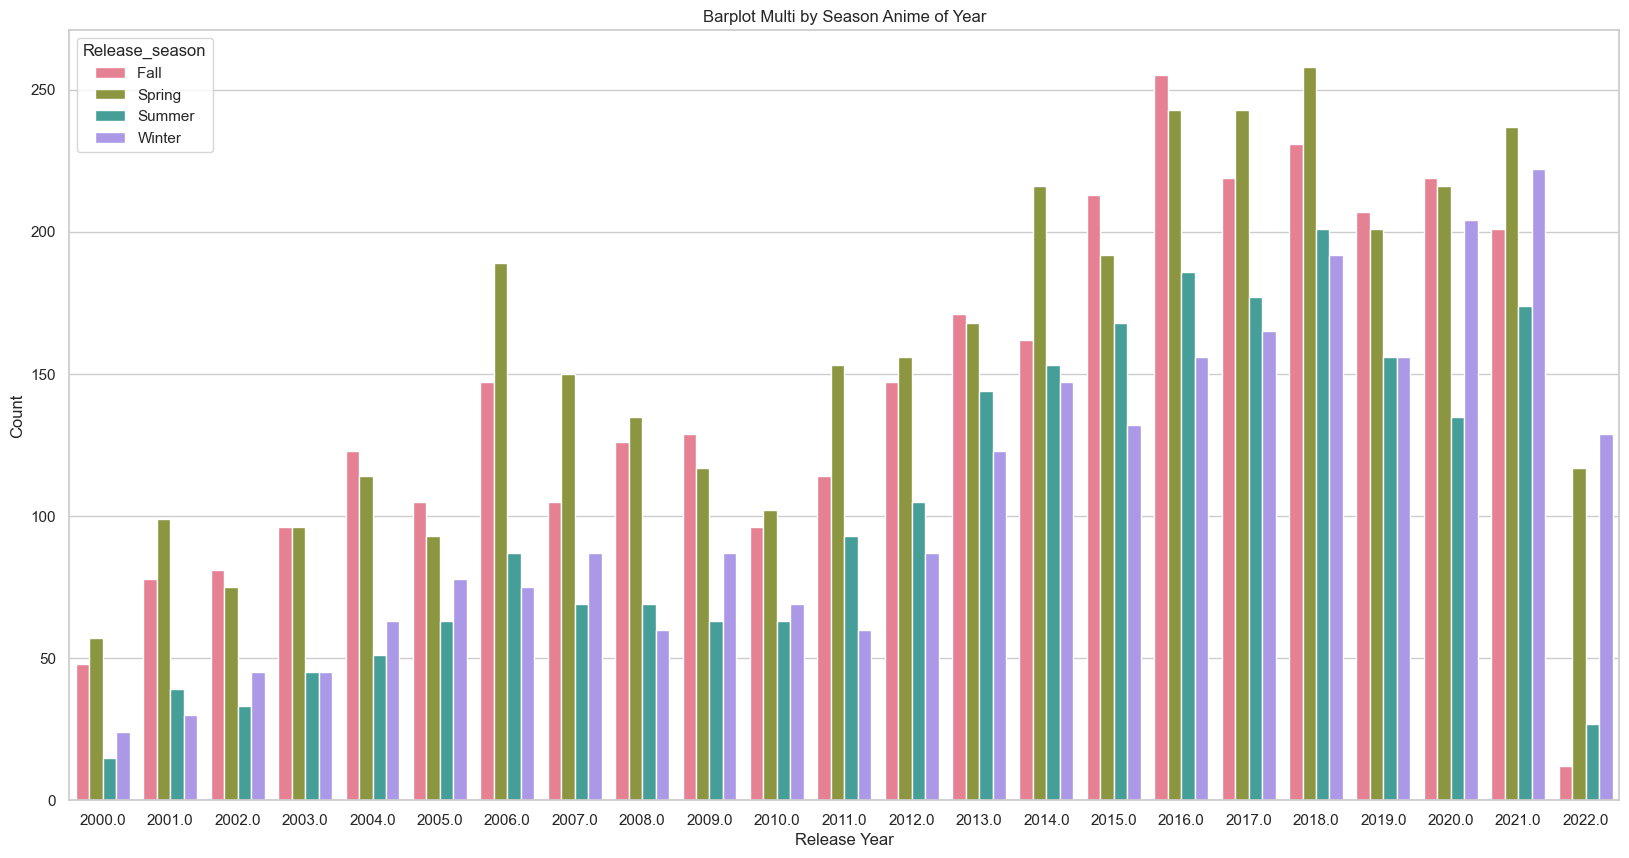

In [141]:
client = MongoClient('mongodb://localhost:27017/')
filter={'Release_year': {'$gte': 2000, '$lte': 2022}}
project={'Name': 1, 'Release_year': 1, 'Release_season': 1}
sort=list({'Release_year': 1}.items())

result = client['6400839_Final']['AnimeDataSet'].find(filter=filter,projection=project,sort=sort)
df = pd.DataFrame(list(result))

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

top_years = df['Release_year'].value_counts().head(23).index
df_top = df[df['Release_year'].isin(top_years)]

sns.countplot(x='Release_year', hue='Release_season', data=df_top, palette='husl')

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Barplot Multi by Season Anime of Year')

### 4. Scatter Plot / แสดงน้ำหนักและส่วนสูงของนักบาส NBA ทีม WAS

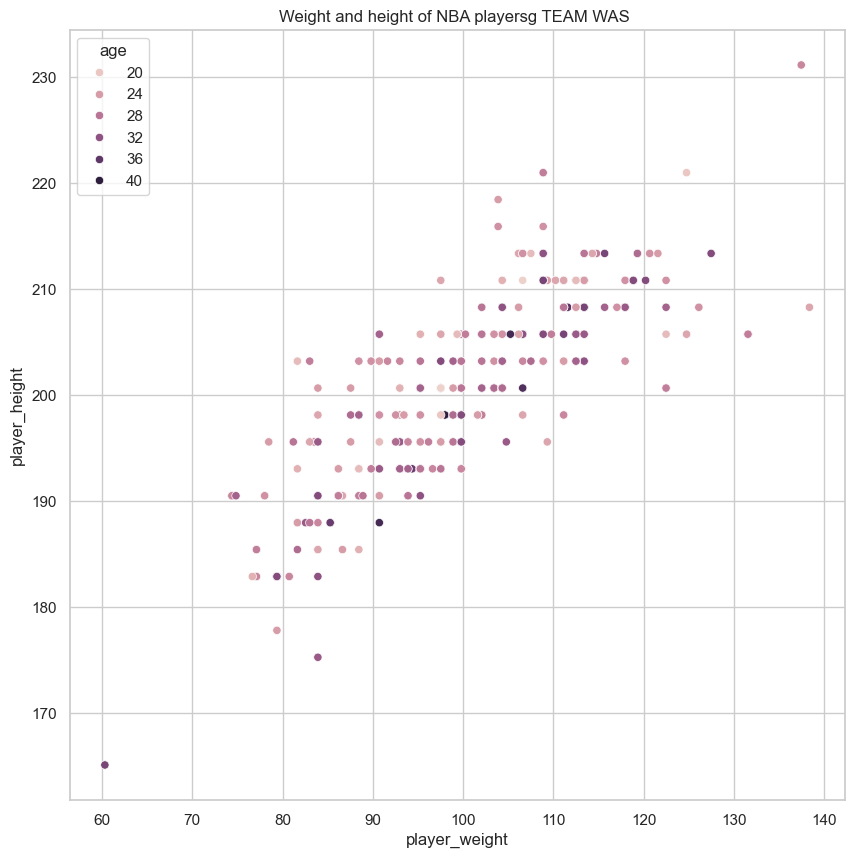

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

client = MongoClient('mongodb://localhost:27017/')
filter={"team_abbreviation": 'WAS'}
project={"age" : 1, "player_height" : 1, "player_weight" : 1}
result = client['6400839_Final']['NBA'].find(filter=filter,projection=project)
df = pd.DataFrame(list(result))

plt.figure(figsize=(10, 10))

sns.scatterplot(x='player_weight', y='player_height', hue='age', data=df)
plt.title('Weight and height of NBA playersg TEAM WAS ')
plt.show()

### 5. Line Plot หรือ Area Plot (ข้อมูลที่มีเวลาเท่านั้น) / Rating ของ Anime ในแต่ละปี

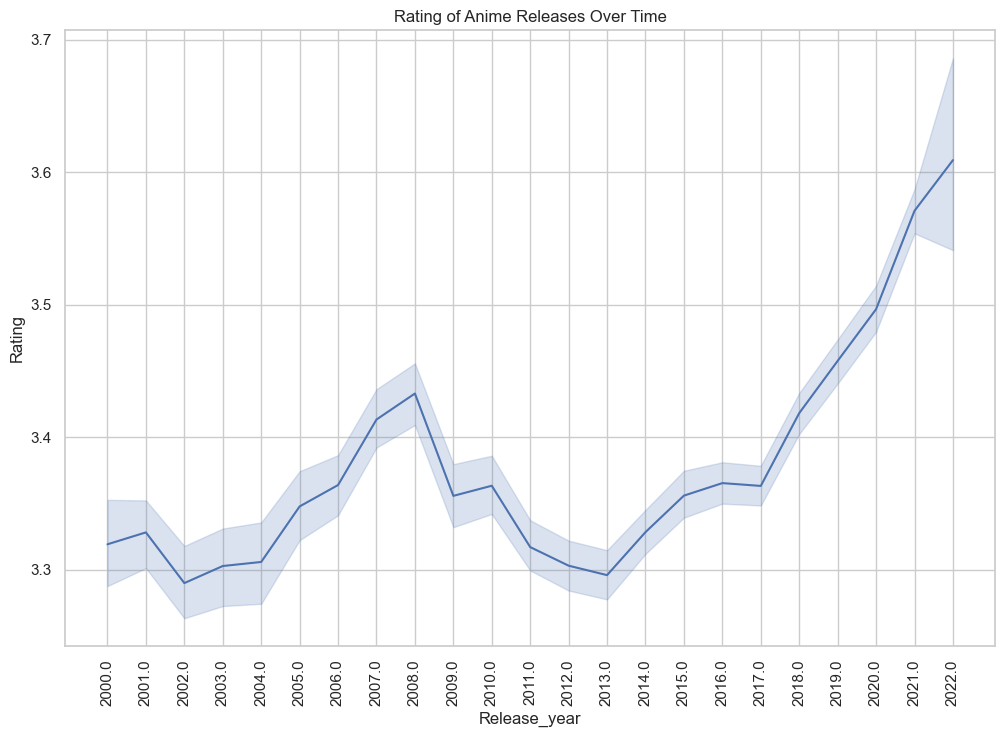

In [118]:
client = MongoClient('mongodb://localhost:27017/')
filter={'Release_year': {'$gte': 2000, '$lte': 2022}}
project={'Name': 1, 'Rating': 1, 'Release_year': 1, }
sort=list({'Release_year': 1}.items())

result = client['6400839_Final']['AnimeDataSet'].find(filter=filter,projection=project,sort=sort)
df = pd.DataFrame(list(result))

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.lineplot(x='Release_year', y='Rating', data=df)

plt.title('Rating of Anime Releases Over Time')
plt.xticks(rotation=90)
plt.xticks(ticks=df['Release_year'].unique(), labels=df['Release_year'].unique())
plt.show()

### 6. Box Plot (Multi มีหลายกล่อง) / แสดงถึงช่วงอายุในแต่ละเพศที่ขึ้นคลาสต่างๆ

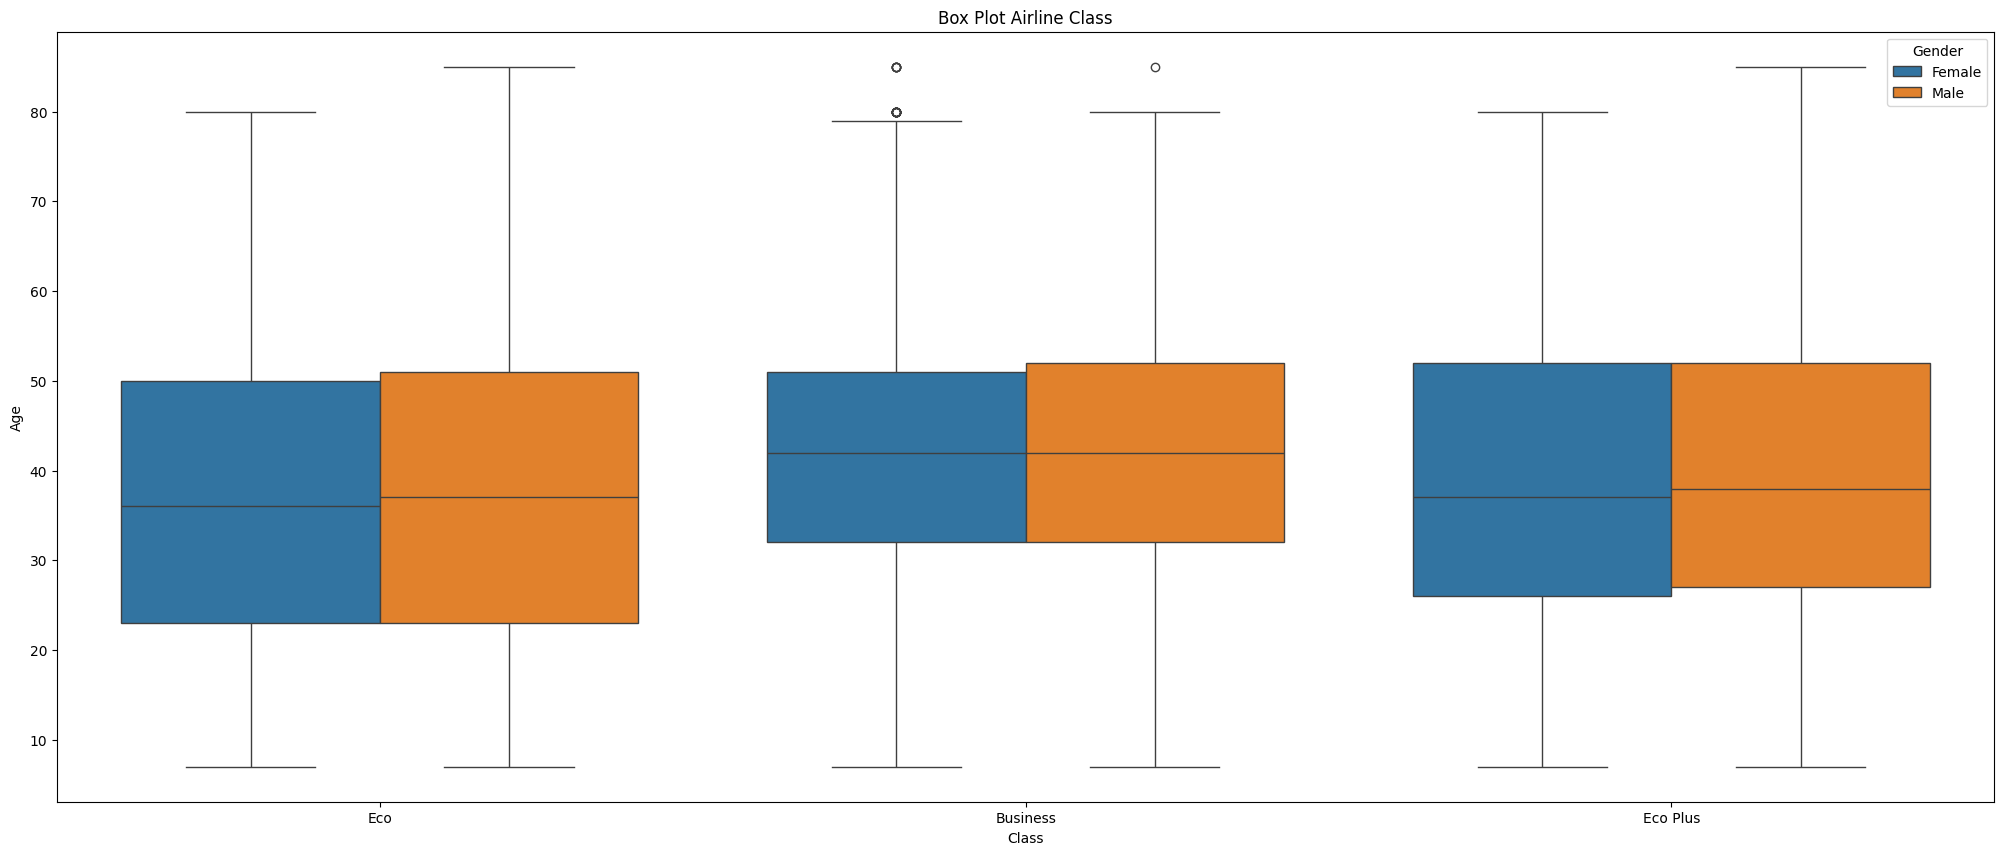

In [10]:
client = MongoClient('mongodb://localhost:27017/')
filter={}
project={'Gender': 1, 'Class': 1, 'Age': 1}
result = client['6400839_Final']['Airline'].find(filter=filter,projection=project)
df = pd.DataFrame(list(result))

plt.figure(figsize=(25, 10))
sns.boxplot(x='Class', y='Age', hue='Gender', data=df)
plt.title('Box Plot Airline Class')
plt.show()